# Normalização e Regularização

## Revisão

### Regressão Linear Simples


<img src = "./imgs/reg_lin_explicacao.png" width = "30%"></img>


Na regressão linear simples, temos o modelo como: $Y \approx \beta_0 + \beta_1 X$

- $Y$ é a variável dependente, pois é escrita em função de variável $X$
- $X$ é a variável independente, pois a partir dela chegaremos em valores estimados de $Y$, também denotado por $\hat{Y}$
- $\beta_0$ é chamado de **intercepto** pois define o valor que intercepta o eixo $y$ quando $x = 0$. Muitas vezes pode ser interpretado como o valor mínimo associado ao determinado experimento.
- $\beta_1$ é chamado de **coeficiente angular**, ou ainda, **coeficiente de proporcionalidade**, pois define a qual taxa as variáveis $X$ e $Y$ se relacionam.

A questão agora é, como encontramos os valores de $\tilde{\beta}$?

### Regressão Linear Múltipla

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Carregando o CSV
cars = pd.read_csv("./data/CarPrice.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cols = ['fueltype',
        'aspiration',
        'doornumber',
        'carbody', 
        'cylindernumber',
        'drivewheel',
        'enginelocation',
        'enginetype',
        'fuelsystem']

In [9]:
np.random.seed(7)
x = np.linspace(-5,5,100)
z = 2*x
y = 10+ 2*x + x**2 + 0.5*x**3 + z + np.random.normal(0,4,size = len(x))

In [10]:
print(x)

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

In [14]:
print(z)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [15]:
# dummies
cars_with_dummies = pd.get_dummies(cars, prefix_sep="_", columns=cols, drop_first=True)

In [16]:
cars_with_dummies.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [17]:
#dummies
X = cars_with_dummies.drop(["car_ID", "symboling", "CarName","price"], axis = 1)
y = cars_with_dummies.price

In [18]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [19]:
# Instancia o modelo
linreg = LinearRegression()

In [20]:
# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
linreg.fit(X_train, y_train)

LinearRegression()

In [21]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = linreg.predict(X_test)

In [22]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
rmse

2921.7685627383025

In [23]:
metrics.r2_score(y_test, y_pred)

0.8439314210774072

In [24]:
#intercept
linreg.intercept_

-12998.989001017113

In [25]:
coefs = linreg.coef_

list_columns = X.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Vars': list_feature,
              'Coefs': list_score}

df_features = pd.DataFrame(dictionary)
df_features[["abs_coefs"]] = df_features.Coefs.abs()
df_features = df_features.sort_values(by=['abs_coefs'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

,Vars,Coefs,abs_coefs
0,cylindernumber_four,-1.205922e+04,1.205922e+04
1,cylindernumber_twelve,-1.051566e+04,1.051566e+04
2,cylindernumber_five,-1.031054e+04,1.031054e+04
3,enginelocation_rear,9.422799e+03,9.422799e+03
4,enginetype_ohcv,-8.238196e+03,8.238196e+03
5,enginetype_dohcv,-7.591478e+03,7.591478e+03
6,cylindernumber_six,-7.190362e+03,7.190362e+03
7,fuelsystem_mfi,-6.111018e+03,6.111018e+03
8,fueltype_gas,-5.754931e+03,5.754931e+03
9,fuelsystem_idi,5.754931e+03,5.754931e+03


# Normalização

Uma pergunta natural que surge ao se olhar para os coeficientes da regressão é "Qual a variável que mais contribuí para explicar minha medida de interesse?". Uma possibilidade seria pensar em avaliar os coeficientes gerados pela regressão e verificar quais tem o maior valor absoluto, correto?

Vamos pensar no caso em que queremos predizer renda (em reais) de uma pessoa com base na sua idade (em anos), altura (em cm) e peso (em kg). Logo:

$$ Renda = \beta_0 + \beta_1*Idade + \beta_2*Altura + \beta_3*Peso \\ = 1100 + 0.3*Idade + 0.2*Altura + 0.4*Peso$$

Disso temos que **um aumento de 20cm na altura de uma pessoa tem o mesmo efeito na renda do que aumentar o peso em 10 unidades**. 

Para remover o efeito de escala das variáveis e conseguirmos analisar o impacto das variáveis nos modelos que nós aplicamos o processo de normalização, i.e., calcular o Z-score de cada observação:

$$Z_i = \dfrac{X_i - \overline{X}}{\sigma_X}$$

Dado que estamos utilizando o Z-Score agora a interpretação do coeficiente muda e passamos a entender que **a cada 1 desvio padrão em X temos uma mudança de $\beta$ desvios padrões de Y**, muito embora nós não fazemos essa distinção e usamos os coeficientes normalizados apenas como **Rank** para avaliar a importância de cada variável para o modelo.

Ex.:

$$Y = \beta_0 + 0.5*X_1 + 1*X_2 + \epsilon$$

Neste caso $X_2$ é duas vezes mais importante que $X_1$ para predizer $Y$, assumindo que $X_1$ e $X_2$ sigam aproximadamente a mesma distribuição e portanto seus desvios padrões não sejam tão diferentes.

$$ Renda = \beta_0 + \beta_1*Idade Normalizada + \beta_2*Altura Normalizada + \beta_3*Peso Normalizada \\ = 0.2*Idade Normalizada + 0.7*Altura  Normalizada+ 0.21*Peso  Normalizada$$

## Refazendo a regressão

In [26]:
# pacote
from sklearn.preprocessing import StandardScaler

In [44]:
#Scaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
    #scaler.fit(X_train)
    #X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

y_train_std = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_std = scaler.transform(y_test.values.reshape(-1, 1))


In [31]:
#Original x Padronizado
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
116,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95,4150,28,33,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
94,94.5,165.3,63.8,54.5,1951,97,3.15,3.29,9.4,69,5200,31,37,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
36,96.5,157.1,63.9,58.3,2024,92,2.92,3.41,9.2,76,6000,30,34,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
85,96.3,172.4,65.4,51.6,2365,122,3.35,3.46,8.5,88,5000,25,32,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
181,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,9.2,156,5200,19,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
X_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0
mean,99.158741,175.185315,66.117483,53.855944,2597.146853,130.405594,3.336993,3.276713,10.126713,107.069930,5094.405594,25.013986,30.356643,0.902098,0.202797,0.440559,0.034965,0.328671,0.461538,0.139860,0.062937,0.762238,0.125874,0.0,0.006993,0.013986,0.566434,0.391608,0.006993,0.006993,0.048951,0.734266,0.055944,0.062937,0.013986,0.314685,0.013986,0.097902,0.006993,0.468531,0.041958,0.0
std,6.093027,12.498400,2.221607,2.457143,550.647148,43.316269,0.270974,0.312700,3.950850,41.057269,472.448853,6.531598,6.950940,0.298227,0.403496,0.498199,0.184337,0.471381,0.500271,0.348061,0.243703,0.427209,0.332873,0.0,0.083624,0.117845,0.497309,0.489826,0.083624,0.083624,0.216524,0.443276,0.230621,0.243703,0.117845,0.466023,0.117845,0.298227,0.083624,0.500763,0.201198,0.0
min,86.600000,144.600000,61.800000,47.800000,1713.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,94.500000,167.050000,64.200000,52.000000,2157.000000,97.500000,3.150000,3.150000,8.600000,71.500000,4800.000000,19.000000,25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,97.200000,173.600000,65.600000,54.100000,2455.000000,121.000000,3.310000,3.290000,9.000000,97.000000,5100.000000,24.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,102.800000,186.600000,67.200000,55.700000,3018.000000,146.000000,3.595000,3.435000,9.400000,122.000000,5450.000000,30.000000,34.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [40]:
X_train_copy = X_train.copy(deep = True)

In [41]:
X_train_copy[["carw_std"]] = (X_train_copy.carwidth - X_train_copy.carwidth.mean())/X_train_copy.carwidth.std()

In [42]:
X_train_copy[["carwidth","carw_std"]]

,carwidth,carw_std
116,68.4,1.027417
94,63.8,-1.043156
36,63.9,-0.998144
85,65.4,-0.322957
181,66.5,0.172181
51,64.2,-0.863106
184,65.5,-0.277944
203,68.9,1.252480
84,66.3,0.082156
163,64.0,-0.953131


In [38]:
(X_train.carwidth - X_train.carwidth.mean())/X_train.carwidth.std()

116    1.027417
94    -1.043156
36    -0.998144
85    -0.322957
181    0.172181
51    -0.863106
184   -0.277944
203    1.252480
84     0.082156
163   -0.953131
97    -1.043156
37    -0.412981
134    0.172181
140   -1.043156
104    0.802355
150   -1.133181
49     2.017692
199    0.487268
5      0.082156
17     2.152729
121   -1.043156
173    0.172181
180    0.172181
105    0.802355
62     0.172181
64     0.172181
26    -1.043156
102    0.172181
41    -0.412981
52    -0.863106
177    0.172181
81    -0.322957
7      2.377791
91    -1.043156
178    0.712330
169   -0.232932
70     2.512829
171   -0.232932
114    1.027417
8      2.377791
106    0.802355
79    -1.043156
129    2.782903
132    0.172181
29     0.082156
3      0.037143
39    -0.412981
50    -0.863106
77    -0.773081
168   -0.232932
111    1.027417
117    0.982405
54    -0.863106
90    -1.043156
189   -0.863106
43    -1.943405
146   -0.322957
48     1.567567
156   -0.773081
59     0.172181
15     0.352230
53    -0.863106
20    -1

In [39]:
X_train_std

array([[ 1.43967589,  0.92453107,  1.03102867, ..., -0.93892436,
        -0.20927403,  0.        ],
       [-0.76728966, -0.7937065 , -1.04682261, ..., -0.93892436,
        -0.20927403,  0.        ],
       [-0.43789182, -1.4520966 , -1.00165193, ..., -0.93892436,
        -0.20927403,  0.        ],
       ...,
       [-0.8990488 , -1.4360383 , -1.04682261, ..., -0.93892436,
        -0.20927403,  0.        ],
       [ 0.84675977,  1.09314317,  0.48898051, ...,  1.06504852,
        -0.20927403,  0.        ],
       [ 0.53383182,  0.0332957 ,  0.17278575, ...,  1.06504852,
        -0.20927403,  0.        ]])

In [45]:
X_test_std

array([[-0.4708316 , -0.22363703, -0.32409173, ..., -0.93892436,
         4.77842373,  0.        ],
       [-0.32260257, -0.25575362, -0.32409173, ...,  1.06504852,
        -0.20927403,  0.        ],
       [-0.8990488 , -1.4360383 , -1.04682261, ..., -0.93892436,
        -0.20927403,  0.        ],
       ...,
       [-0.32260257, -0.14334555, -0.41443309, ..., -0.93892436,
        -0.20927403,  0.        ],
       [ 1.43967589,  0.92453107,  1.03102867, ...,  1.06504852,
        -0.20927403,  0.        ],
       [-0.63553053, -0.49662804, -0.18857969, ...,  1.06504852,
        -0.20927403,  0.        ]])

In [46]:
y_train[0:10]

116    17950.0
94      7299.0
36      7295.0
85      6989.0
181    15750.0
51      6095.0
184     7995.0
203    22470.0
84     14489.0
163     8058.0
Name: price, dtype: float64

In [47]:
y_train_std[0:10]

array([[ 0.52381914],
       [-0.77911222],
       [-0.77960154],
       [-0.81703437],
       [ 0.25469427],
       [-0.92639693],
       [-0.6939709 ],
       [ 1.07674842],
       [ 0.10043679],
       [-0.68626414]])

In [48]:
# Regressao
linreg_std = LinearRegression()
linreg_std.fit(X_train_std, y_train_std)

LinearRegression()

In [49]:
pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

In [50]:
#coefs
linreg_std.intercept_

array([-0.])

In [51]:
linreg.intercept_

-12998.989001017113

In [52]:
#coefs
linreg_std.coef_

array([[-0.08247662, -0.08490954,  0.14572023,  0.01921136,  0.42931734,
         0.63597101,  0.02849043, -0.19386664, -0.40289166,  0.00551629,
         0.1222803 ,  0.04680192,  0.03618766, -0.20921562,  0.1359878 ,
         0.04272507, -0.09051092, -0.17299837, -0.07764807, -0.11987232,
        -0.30630233, -0.62801053, -0.29176764, -0.        , -0.10719535,
        -0.00881986,  0.02080304, -0.07006472,  0.09605484, -0.07738658,
        -0.0080644 ,  0.18345338, -0.00332967, -0.24473772, -0.00881986,
        -0.0092713 , -0.00881986,  0.20921562, -0.06229496, -0.00683367,
        -0.10983376,  0.        ]])

In [53]:
linreg.coef_

array([  -111.04281875,    -55.73073656,    538.07811116,     64.138733  ,
            6.3958421 ,    120.44228208,    862.51054822,  -5085.90795284,
         -836.54725442,      1.10217383,      2.12321709,     58.78099342,
           42.70803882,  -5754.93089308,   2764.73437592,    703.51346221,
        -4027.92439884,  -3010.66439621,  -1273.26323537,  -2825.245751  ,
       -10310.54269413, -12059.21681807,  -7190.36176997,      0.        ,
       -10515.66333866,   -613.96273155,    343.1573447 ,  -1173.41227749,
         9422.79938434,  -7591.47827009,   -305.53325314,   3395.03424437,
         -118.43870826,  -8238.19621905,   -613.96273155,   -163.20234703,
         -613.96273155,   5754.93089308,  -6111.01835953,   -111.94763279,
        -4478.21400858,      0.        ])

In [59]:
coefs = linreg_std.coef_

list_columns = X.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs[0]):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Vars': list_feature,
              'Coefs': list_score}

df_features_std = pd.DataFrame(dictionary)
df_features_std[["abs_coefs"]] = df_features_std.Coefs.abs()
df_features_std = df_features_std.sort_values(by=['abs_coefs'], ascending=False)
df_features_std.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features_std

,Vars,Coefs,abs_coefs
0,enginesize,0.64,0.64
1,cylindernumber_four,-0.63,0.63
2,curbweight,0.43,0.43
3,compressionratio,-0.40,0.40
4,cylindernumber_five,-0.31,0.31
5,cylindernumber_six,-0.29,0.29
6,enginetype_ohcv,-0.24,0.24
7,fuelsystem_idi,0.21,0.21
8,fueltype_gas,-0.21,0.21
9,stroke,-0.19,0.19


In [55]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [54]:
df_features

,Vars,Coefs,abs_coefs
0,cylindernumber_four,-12059.22,12059.22
1,cylindernumber_twelve,-10515.66,10515.66
2,cylindernumber_five,-10310.54,10310.54
3,enginelocation_rear,9422.80,9422.80
4,enginetype_ohcv,-8238.20,8238.20
5,enginetype_dohcv,-7591.48,7591.48
6,cylindernumber_six,-7190.36,7190.36
7,fuelsystem_mfi,-6111.02,6111.02
8,fueltype_gas,-5754.93,5754.93
9,fuelsystem_idi,5754.93,5754.93


### ou de forma mais simples...

**Para Regressão Linear:**

$$\gamma_i = \beta_i * \dfrac{\sigma_{X_i}}{\sigma_Y}$$

**Para Regressão Logistica:**
$$\gamma_i = \dfrac{\sqrt{3}}{\pi}*\dfrac{\sigma_{X_i}}{\beta_i}$$



EX.:

In [60]:
std_y = y_train.std()

In [61]:
std_x = X_train.std()

In [64]:
np.sort(abs(linreg.coef_*(std_x/std_y)))

array([0.        , 0.        , 0.00332967, 0.00551629, 0.00683367,
       0.0080644 , 0.00881986, 0.00881986, 0.00881986, 0.0092713 ,
       0.01921136, 0.02080304, 0.02849043, 0.03618766, 0.04272507,
       0.04680192, 0.06229496, 0.07006472, 0.07738658, 0.07764807,
       0.08247662, 0.08490954, 0.09051092, 0.09605484, 0.10719535,
       0.10983376, 0.11987232, 0.1222803 , 0.1359878 , 0.14572023,
       0.17299837, 0.18345338, 0.19386664, 0.20921562, 0.20921562,
       0.24473772, 0.29176764, 0.30630233, 0.40289166, 0.42931734,
       0.62801053, 0.63597101])

# Voltamos 20:35

# Regularização

In [66]:
import random

In [67]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])

np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))

data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

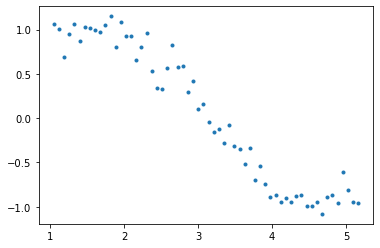

In [68]:
plt.plot(data['x'],data['y'],'.');

In [69]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
tranformer = PolynomialFeatures(degree = 15, include_bias=False)
x = x.reshape((-1,1))

tranformer.fit(x)

# transforma os dados incluindo uma nova coluna com valores quadráticos
trans_x = tranformer.transform(x)
trans_x

array([[1.04719755e+00, 1.09662271e+00, 1.14838062e+00, 1.20258137e+00,
        1.25934027e+00, 1.31877804e+00, 1.38102114e+00, 1.44620195e+00,
        1.51445914e+00, 1.58593791e+00, 1.66079029e+00, 1.73917553e+00,
        1.82126035e+00, 1.90721938e+00, 1.99723547e+00],
       [1.11701072e+00, 1.24771295e+00, 1.39370874e+00, 1.55678761e+00,
        1.73894845e+00, 1.94242406e+00, 2.16970850e+00, 2.42358766e+00,
        2.70717340e+00, 3.02394171e+00, 3.37777531e+00, 3.77301124e+00,
        4.21449401e+00, 4.70763499e+00, 5.25847875e+00],
       [1.18682389e+00, 1.40855095e+00, 1.67170192e+00, 1.98401578e+00,
        2.35467732e+00, 2.79458730e+00, 3.31668298e+00, 3.93631860e+00,
        4.67171696e+00, 5.54450530e+00, 6.58035136e+00, 7.80971820e+00,
        9.26876015e+00, 1.10003860e+01, 1.30555209e+01],
       [1.25663706e+00, 1.57913670e+00, 1.98440171e+00, 2.49367273e+00,
        3.13364157e+00, 3.93785014e+00, 4.94844842e+00, 6.21840369e+00,
        7.81427654e+00, 9.81970950e+0

In [70]:
data = pd.DataFrame(trans_x, columns=["x"] + [f'x_{i}' for i in range(2,16)])

In [71]:
data[['y']] = y
data

,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,y
0,1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2,1.1
1,1.1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3,1
2,1.2,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13,0.7
3,1.3,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31,0.95
4,1.3,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69,1.1
5,1.4,1.9,2.7,3.8,5.3,7.4,10,14,20,28,39,55,77,1.1e+02,1.5e+02,0.88
6,1.5,2.1,3.2,4.6,6.8,9.9,15,21,31,46,67,99,1.4e+02,2.1e+02,3.1e+02,1
7,1.5,2.4,3.6,5.6,8.5,13,20,31,48,73,1.1e+02,1.7e+02,2.6e+02,4.1e+02,6.2e+02,1
8,1.6,2.6,4.1,6.6,11,17,28,44,71,1.1e+02,1.8e+02,2.9e+02,4.7e+02,7.6e+02,1.2e+03,1
9,1.7,2.8,4.7,7.9,13,22,37,62,1e+02,1.7e+02,2.9e+02,4.9e+02,8.2e+02,1.4e+03,2.3e+03,0.97


In [72]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend([f'x_{i}' for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

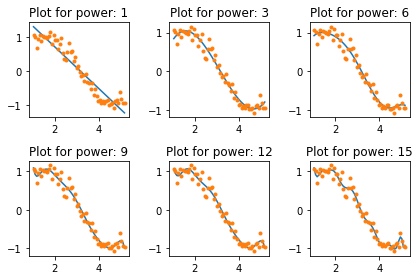

In [73]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [74]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


A medida que a complexidade do modelo aumento, os coeficientes aumento exponencialmente. Isso significa que estamos colocando muita enfase naquela feature e quando se torna muito grande isso indica que o algoritmo está modelando relações complexas para estimar o output e acaba ocorrendo overfitting. Para penalizar os coeficientes ao se adicionar muitas variáveis, e com isso lidar com o overfitting em grandes conjuntos de dados que aplicamos regularização.

## Regularização Ridge ou L2

$$mse = \dfrac{1}{n}\sum_{i=1}^n(Y_i - p_\beta(X_i))^2 + \lambda\sum_{i=1}^n\beta_i^2$$

em que 

$$p_\beta(X) = \beta_0 +\beta_1X + \beta_2X^2+...+\beta_k X^k$$

De forma que quando:
- $\lambda = 0$
    - voltamos a regressão linear usual
- $\lambda \rightarrow \infty$
    - $\tilde{\beta} \rightarrow 0$ para combater o efeito da penalização dado que qualquer valor diferente de 0 tornaria a função de otimização divergente.
- $\lambda \in (0;\infty)$
    - A magnitude de $\lambda$ definirá o peso dos coeficientes entre 0 e o valor da regressão simples.
   

In [75]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59334e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


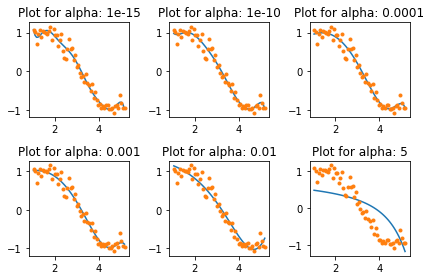

In [76]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Conforme discutido, quando lambda aumenta a complexidade do modelo reduz. Porém atenção isso pode causar **undefitting**

In [77]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,95,-3e+02,3.8e+02,-2.4e+02,71,-2,-3.7,0.4,0.17,-0.025,-0.0057,0.00082,0.00021,-5.1e-05,3.3e-06,-3.9e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


Conclusões:
- O erro aumenta conforme lambda aumenta, pois a complexidade do modelo está diminuindo.
- Mesmo um valor infimo de lambda reduz significativamente os valores dos coeficientes
- Valores elevados de lambda podem facilmente gerar underfitting.
- Apesar dos coeficientes serem pequenos eles **NÃO SÃO IGUAIS A ZERO**, pois lambda é um valor finito.

In [111]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

## Regularização Lasso ou L1

LASSO - *Least Absolute Shrinkage and Selection Operator* se aproxima muito da regressão Ridge, mas duas palavras aqui são fundamentais: **absolute** e **selection**.

$$mse = \dfrac{1}{n}\sum_{i=1}^n(Y_i - p_\beta(X_i))^2 + \lambda\sum_{i=1}^n|\beta_i|$$

em que 

$$p_\beta(X) = \beta_0 +\beta_1X + \beta_2X^2+...+\beta_k X^k$$

In [78]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47835738259038024, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47828183990570994, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47079330190426194, tolerance: 0.003694803842184409
  model = cd_fast.enet_coordinate_descent(


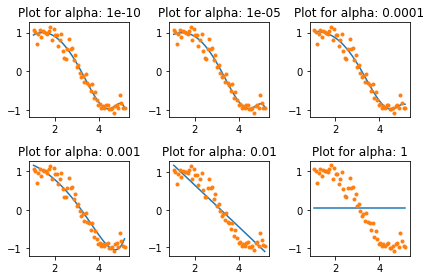

In [116]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [117]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [119]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

**Conclusões:**
- O erro aumenta conforme lambda aumenta, pois a complexidade do modelo está diminuindo.
- Mesmo um valor infimo de lambda reduz significativamente os valores dos coeficientes
- Valores elevados de lambda podem facilmente gerar underfitting.
- A partir de determinados valores de lambda os coeficientes começam a **SE TORNAR IGUAIS A ZERO**. Nesse sentido Lasso pode ser utilizado como um método de seleção de variáveis.

**Comparativo com Ridge (não é regra):**
- Para um mesmo valor de lambda, os coeficientes da Lasso são bem menores.
- Para um mesmo valor de lambda, a Lasso tem um erro maior (pior ajuste).

EX.: CArs

In [90]:
linreg_lasso = Lasso(alpha=10,normalize=True, max_iter=1e5)
linreg_lasso.fit(X_train, y_train)

Lasso(alpha=10, max_iter=100000.0, normalize=True)

In [91]:
linreg_lasso.coef_

array([    0.        ,     0.        ,   485.95604944,     5.41635567,
           2.85553146,   119.61323329,    -0.        , -3369.90156655,
           0.        ,     0.        ,     1.19479717,     0.        ,
          -0.        ,   -35.8591571 ,  1957.40876695,   261.13757238,
       -2379.02504935, -1293.62446402,     0.        , -1379.69629639,
          -0.        , -2940.61371288,    -0.        ,     0.        ,
       -5568.74380472,  2447.62030061,    -0.        ,     0.        ,
       10010.15118911,   824.23248006,  -274.79498086,  1814.97907077,
          -0.        , -3274.05783207,   918.21662966,    -0.        ,
           0.        ,     0.        , -1911.7913483 ,     0.        ,
       -1482.20648133,     0.        ])

In [86]:
linreg.coef_

array([  -111.04281875,    -55.73073656,    538.07811116,     64.138733  ,
            6.3958421 ,    120.44228208,    862.51054822,  -5085.90795284,
         -836.54725442,      1.10217383,      2.12321709,     58.78099342,
           42.70803882,  -5754.93089308,   2764.73437592,    703.51346221,
        -4027.92439884,  -3010.66439621,  -1273.26323537,  -2825.245751  ,
       -10310.54269413, -12059.21681807,  -7190.36176997,      0.        ,
       -10515.66333866,   -613.96273155,    343.1573447 ,  -1173.41227749,
         9422.79938434,  -7591.47827009,   -305.53325314,   3395.03424437,
         -118.43870826,  -8238.19621905,   -613.96273155,   -163.20234703,
         -613.96273155,   5754.93089308,  -6111.01835953,   -111.94763279,
        -4478.21400858,      0.        ])

In [87]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')